## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.T

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  5],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

In [77]:
%%time
n = X.shape[1]
# alpha = 1e-2
W = np.array([1, 0.5])
W_old  = np.array([0,0])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')
mse = np.inf
w_new = np.array([])
# выбранное значение alpha_checked сначала приравняем к бесконечности (т.к. alpha_checked еще не определено)
alpha_checked = np.inf
# значение alpha подбирается из короткого списка возможных значений
# в списке numpy массиве W будут храниться значения, которые будут проверяться на mse
# в списке numpy массиве W_old будут храниться значения, которые уже проверены на mse; если mse удовлетворит критерию в коде
# то W_old сохранится в w_new, alpha - в alpha_checked
for alpha in [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11]:
    W = np.array([1, 0.5])
    W_old  = np.array([0,0])
    i=1
    while (W[0]-W_old[0]>alpha) | (W[1]-W_old[1]>alpha):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W_old = W.copy()        
#         это будет использовано в следующем цикле для вычисления y_pred и err; для текущих W err уже вычислена
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
#         if i % 10 == 0:
#             alpha /= 1.1
        i+=1
    if err<mse:
        mse = err
        w_new = W_old
        alpha_checked = alpha#/(1/1.1)
    else:
        break
    print(alpha_checked, mse)
print(f'Потребовалось {i-1} итераций')
print(f'Выбрано значение альфа {alpha_checked}')
print(f'Найдены коэффициенты: {w_new}.')
print(f'MSE: {mse}.')

Number of objects = 10        
Learning rate = 1.2361118984490902e-16        
Initial weights = [1.  0.5] 

0.01 44.525885301240166
Потребовалось 3999 итераций
Выбрано значение альфа 0.01
Найдены коэффициенты: [43.97488723  4.00972181].
MSE: 44.525885301240166.
CPU times: user 259 ms, sys: 5 ms, total: 264 ms
Wall time: 260 ms


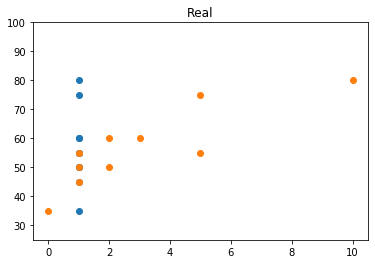

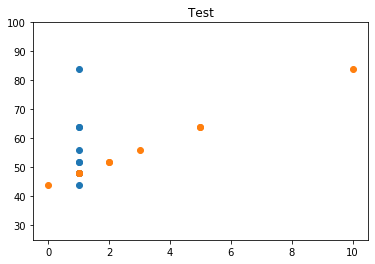

In [78]:
plt.scatter(X.T[:,0],y);
plt.scatter(X.T[:,1],y);
plt.title('Real')
plt.ylim(25,100)
plt.show()
plt.scatter(X.T[:,0],y_pred);
plt.scatter(X.T[:,1],y_pred);
plt.ylim(25,100)
plt.title('Test');

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [79]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
W_pred = np.array([0,0])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

i=1
while (W[0]-W_pred[0]>alpha) | (W[1]-W_pred[1]>alpha):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W_pred = W.copy()
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W_pred}, MSE = {err,2}')
        alpha /= 1.1
    i+=1
W

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #10: W_new = [ 6.27409912 10.61491815], MSE = (752.0184356756685, 2)
Iteration #20: W_new = [ 9.4389504  10.26755155], MSE = (641.6456803977987, 2)
Iteration #30: W_new = [12.06050824  9.79675466], MSE = (556.9384375591593, 2)
Iteration #40: W_new = [14.27459742  9.39540476], MSE = (490.41816270597144, 2)
Iteration #50: W_new = [16.1576422   9.05394988], MSE = (437.47692003273295, 2)
Iteration #60: W_new = [17.76892015  8.76176985], MSE = (394.8281248326431, 2)
Iteration #70: W_new = [19.15528901  8.51037327], MSE = (360.0897927609196, 2)
Iteration #80: W_new = [20.35414242  8.29297969], MSE = (331.50978881178986, 2)
Iteration #90: W_new = [21.39557972  8.10413109], MSE = (307.7813762107256, 2)
Iteration #100: W_new = [22.30402559  7.93939844], MSE = (287.91737475885424, 2)
Iteration #110: W_new = [23.09945118  7.79516027], MSE = (271.1629997668645, 2)
Iteration #120: W_new = [23.7983035

array([29.66920956,  6.60383588])

In [81]:
%%time
n = X.shape[1]
# alpha = 1e-2
W = np.array([1, 0.5])
W_old  = np.array([0,0])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')
mse = np.inf
w_new = np.array([])
# выбранное значение alpha_checked сначала приравняем к бесконечности (т.к. alpha_checked еще не определено)
alpha_checked = np.inf
# значение alpha подбирается из короткого списка возможных значений
# в списке numpy массиве W будут храниться значения, которые будут проверяться на mse
# в списке numpy массиве W_old будут храниться значения, которые уже проверены на mse; если mse удовлетворит критерию в коде
# то W_old сохранится в w_new, alpha - в alpha_checked
for alpha in [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11]:
    W = np.array([1, 0.5])
    W_old  = np.array([0,0])
    i=1
    while (W[0]-W_old[0]>alpha) | (W[1]-W_old[1]>alpha):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W_old = W.copy()        
#         это будет использовано в следующем цикле для вычисления y_pred и err; для текущих W err уже вычислена
        W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1))
#         if i % 10 == 0:
#             alpha /= 1.1
        i+=1
    if err<mse:
        mse = err
        w_new = W_old
        alpha_checked = alpha#/(1/1.1)
    else:
        break
    print(alpha_checked, mse)
print(f'Потребовалось {i-1} итераций')
print(f'Выбрано значение альфа {alpha_checked}')
print(f'Найдены коэффициенты: {w_new}.')
print(f'MSE: {mse}.')

Number of objects = 10        
Learning rate = 1.2361118984490902e-16        
Initial weights = [1.  0.5] 

0.01 44.525885301240166
Потребовалось 3999 итераций
Выбрано значение альфа 0.01
Найдены коэффициенты: [43.97488723  4.00972181].
MSE: 44.525885301240166.
CPU times: user 210 ms, sys: 3.98 ms, total: 214 ms
Wall time: 211 ms
